In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score 

In [2]:

df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')



In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df.duplicated().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 614
Number of Columns: 13


In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df = df.drop('Loan_ID',axis=1)

In [13]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [14]:
df = df.dropna(subset=columns)

In [15]:
df.isnull().sum()*100/len(df)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [16]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [18]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History']).mode()[0]

In [19]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed']).mode()[0]

In [20]:
df.isnull().sum()*100/len(df)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [21]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
221,Male,Yes,2,Graduate,No,4009,1717.0,116.0,360.0,1.0,Semiurban,Y
21,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
80,Female,No,0,Graduate,No,3846,0.0,111.0,360.0,1.0,Semiurban,Y
246,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
475,Male,Yes,2,Graduate,No,16525,1014.0,150.0,360.0,1.0,Rural,Y


In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,1,1


In [24]:
#df['Dependents'] = df['Dependents'].replace(to_replace='3+',value='4')
#df['Dependents'].unique()

In [25]:
x = df.drop('Loan_Status_Y',axis=1)

In [26]:
y = df['Loan_Status_Y']

In [27]:
y.value_counts()

1    389
0    164
Name: Loan_Status_Y, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=101)

In [29]:
cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History']

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[cols] = sc.fit_transform(x[cols])
#x_test = sc.transform(x_test)

In [31]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
1,-0.128694,-0.049699,-0.214368,0.279961,0.0,1,1,1,0,0,0,0,0
2,-0.394296,-0.545638,-0.952675,0.279961,0.0,1,1,0,0,0,0,0,1
3,-0.464262,0.229842,-0.309634,0.279961,0.0,1,1,0,0,0,1,0,1
4,0.109057,-0.545638,-0.059562,0.279961,0.0,1,0,0,0,0,0,0,1
5,0.011239,0.834309,1.440866,0.279961,0.0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.411075,-0.545638,-0.893134,0.279961,0.0,0,0,0,0,0,0,0,0
610,-0.208727,-0.545638,-1.262287,-2.468292,0.0,1,1,0,0,1,0,0,0
611,0.456706,-0.466709,1.274152,0.279961,0.0,1,1,1,0,0,0,0,1
612,0.374659,-0.545638,0.488213,0.279961,0.0,1,1,0,1,0,0,0,1


# LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [33]:
print(accuracy_score(y_test,lr_pred))

0.7266187050359713


# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [35]:
print(accuracy_score(y_test,knn_pred))

0.6187050359712231


# DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

In [37]:
print(accuracy_score(y_test,dtc_pred))

0.6330935251798561


# RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)

In [39]:
print(accuracy_score(y_test,rfc_pred))

0.6762589928057554


# SVM

In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

In [41]:
print(accuracy_score(y_test,svc_pred))

0.7266187050359713


# xgboost

In [42]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(x_train,y_train)
xb_pred = xb.predict(x_test)

In [43]:
print(accuracy_score(y_test,xb_pred))

0.6834532374100719


# AdaBoostClassifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)

In [45]:
print(accuracy_score(y_test,ab_pred))

0.6834532374100719


# GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [47]:
print(accuracy_score(y_test,gb_pred))

0.697841726618705


In [48]:
final_data = pd.DataFrame({'Model':['LR','KNN','DT','RF','SVM','XB','AB','GB'],
                          'Accuracy':[accuracy_score(y_test,lr_pred),
                                     accuracy_score(y_test,knn_pred),
                                     accuracy_score(y_test,dtc_pred),
                                     accuracy_score(y_test,rfc_pred),
                                     accuracy_score(y_test,svc_pred),
                                     accuracy_score(y_test,xb_pred),
                                     accuracy_score(y_test,ab_pred),
                                     accuracy_score(y_test,gb_pred)]})

In [49]:
final_data

,Model,Accuracy
0,LR,0.726619
1,KNN,0.618705
2,DT,0.633094
3,RF,0.676259
4,SVM,0.726619
5,XB,0.683453
6,AB,0.683453
7,GB,0.697842


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

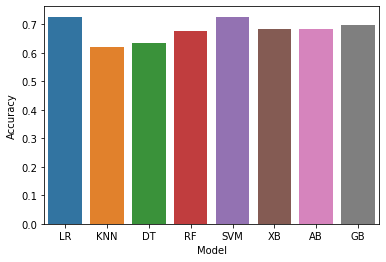

In [50]:
sns.barplot(final_data['Model'],final_data['Accuracy'])

# K-fold cross validation

In [54]:
kfold = KFold(n_splits=15)
result = cross_val_score(xb,x,y,cv=kfold)
result.mean()
result.max()

0.8378378378378378

# GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
    
)

In [57]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [58]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

In [59]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [60]:
xb_x = grid_search.best_estimator_

In [61]:
xb_x.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [62]:
y_pr = xb_x.predict(x_test)

In [63]:
accuracy_score(y_test,y_pr)

0.7194244604316546